In [1]:
import torch
import torchaudio
import torchaudio.functional as F
import librosa
import librosa.display
import os
from src.config_defaults import *
import IPython.display
import numpy as np

%load_ext autoreload
%autoreload 2

os.chdir(PATH_WORK_DIR)

audio_path = "data/raw/train_sample/vio/001__[vio][nod][cou_fol]2194__1.wav"
audio, sr = librosa.load(audio_path, sr=None)

/home/matej/projects/lumen-audio/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(132299,)


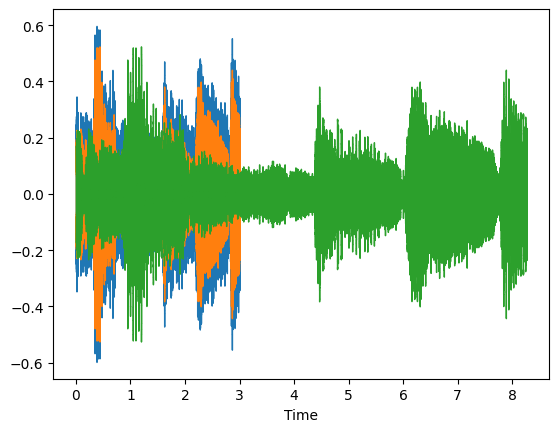

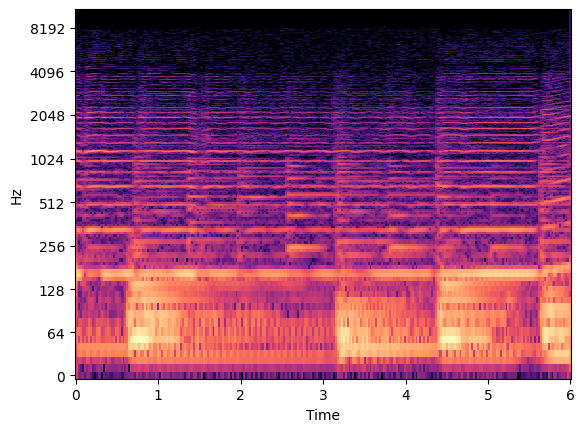

In [10]:
import matplotlib.pyplot as plt

def play_audio(audio, rate):
    IPython.display.display(IPython.display.Audio(data=reconstructed_audio, rate=rate))
    
def plot_audio_and_spectrogram(audio=None, spectrogram=None, sr=16_000):
    if audio is None:
        audio = librosa.istft(spectrogram, length=len(audio))
    if spectrogram is None:
        spectrogram = librosa.stft(audio)
    
    librosa.display.waveshow(y=audio, sr=sr)
    plt.show()
    reference_power = np.max(np.abs(spectrogram))
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(spectrogram), ref=reference_power), y_axis='log', x_axis='time')
    
print(audio.shape)
noise=np.random.normal(0, 0.05, audio.shape[0])

audio_with_noise = audio + noise

librosa.display.waveshow(y=audio_with_noise, sr=sr)
librosa.display.waveshow(y=audio, sr=sr)
IPython.display.Audio(data=audio, rate = sr)

reconstructed_audio = librosa.istft(librosa.stft(audio), length=len(audio))
play_audio(reconstructed_audio, sr)

plot_audio_and_spectrogram(audio)
# librosa.segment.cross_similarity(audio, reconstructed_audio)

In [ ]:
    
y_percussive = librosa.istft(spectrogram_percussive, length=len(audio))
IPython.display.display(IPython.display.Audio(data=y_percussive, rate=sr))

In [ ]:

spectrogram = librosa.stft(audio)
spectrogram_harmonic, spectrogram_percussive = librosa.decompose.hpss(spectrogram, margin=5)

# Pre-compute a global reference power from the input spectrum
reference_power = np.max(np.abs(spectrogram))

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)

img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(spectrogram), ref=reference_power),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Full spectrogram')
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(np.abs(spectrogram_harmonic), ref=reference_power),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Harmonic spectrogram')
ax[1].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(np.abs(spectrogram_percussive), ref=reference_power),
                         y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Percussive spectrogram')
fig.colorbar(img, ax=ax)


y_harmonic = librosa.istft(spectrogram_harmonic, length=len(audio))
IPython.display.display(IPython.display.Audio(data=y_harmonic, rate=sr))

y_percussive = librosa.istft(spectrogram_percussive, length=len(audio))
IPython.display.display(IPython.display.Audio(data=y_percussive, rate=sr))

In [ ]:
y_fast = librosa.effects.time_stretch(audio, rate=2.0)